In [1]:
import pandas as pd

In [2]:
wine = pd.read_csv('winequalityN.csv')

In [3]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Segun el dataset de wine, realice las siguientes actividades:
- Limpie las variables numericas. (evalue primero si vale la pena estretificar por type), en caso de existir valores atipicos remplece por la media.
- Aplique PCA utilizando maximo 5 columnas (evalue si el PCA vale la pena hacer uno para white y otro para red)
    - No se debe de usar quality para este ejercicio
- Una ves tenga el PCA, aplique un algoritmo de k-means para crear tres perfiles del vino. (explique que significa cada perfil)
- Agregue la nueva variable al dateset y elimine las columnas que hayan formado parte de analisis del PCA, tanto para white como para red, en caso que hayan sido entrenamientos distintos.
- Crea la varible de respuesta de la siguiente manera:
    - if quality >= 5 ? 1 else 0
- Elimine la variable quality del dataset
- Aplique los siguientes entrenamientos de MLS (evalue primero si vale la pena estretificar por type):
    - Regresion Logistica
    - NN
    - Aroboles de desiciones
    - Random Forest
- Explique cual de los entrenamientos fue el mejor?

Ejercicio #1
---
Limpieza de variables numericas 

In [5]:
wine.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [9]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']

In [10]:
# Verificacion de la columna type
wine.loc[:,["type"]].value_counts()

type 
white    4898
red      1599
dtype: int64

In [13]:
cols_big = ['fixed acidity', 'residual sugar', 'free sulfur dioxide',
           'total sulfur dioxide', 'pH', 'alcohol', 'quality']
cols_small = ['sulphates', 'chlorides', 'citric acid', 'volatile acidity']


Se van a separar los valores en dos tipos grandes y pequeños.
- Los grandes son valores mayores a 1 
- Los menores son valores menores a 1
* De esta manera evitamos la atipicidad en valores que quiza no lo tengan si se hace el análisis con todas las variables 

In [23]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [14]:
# Verificación de las columnas validas de valores grandes, se usará un umbral de 0.8
cols_valids_b = []
cols_many_level_b = []
cols_one_level_b  = []

size = wine.shape[0]
umbral = 0.8

for c in cols_big:
    level = wine.loc[:,c].drop_duplicates().shape[0]
    if (level/size) >= umbral:
        cols_many_levels_b.append(c)
    elif level == 1:
        cols_one_level_b.append(c)
    else:
        cols_valids_b.append(c)

In [15]:
#Columnas Validas
cols_valids_b

['fixed acidity',
 'residual sugar',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'pH',
 'alcohol',
 'quality']

In [25]:
cols_valids_sm = []
cols_many_level_sm = []
cols_one_level_sm  = []

size = wine.shape[0]
umbral = 0.8

for c in cols_small:
    level = wine.loc[:,c].drop_duplicates().shape[0]
    if (level/size) >= umbral:
        cols_many_levels_sm.append(c)
    elif level == 1:
        cols_one_level_sm.append(c)
    else:
        cols_valids_sm.append(c)

In [26]:
cols_valids_sm

['sulphates', 'chlorides', 'citric acid', 'volatile acidity']

Al haber hecho un análisis de los boxplot de cada uno de las casillas numéricas se encontró que las que tienen valores atípicos son: 
- free sulfur dioxide
- total sulfur dioxide
- alcohol (poco)
- quality

{'whiskers': [<matplotlib.lines.Line2D at 0x245d3e2f070>,
 'caps': [<matplotlib.lines.Line2D at 0x245d3e2f610>,
 'boxes': [<matplotlib.lines.Line2D at 0x245d3e1fd60>],
 'medians': [<matplotlib.lines.Line2D at 0x245d3e2fbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x245d3e2fe80>],
 'means': []}

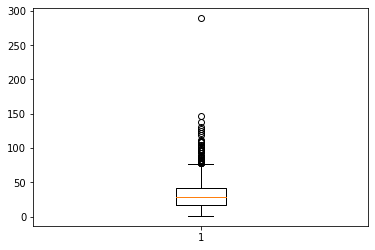

In [40]:
plt.boxplot(wine["free sulfur dioxide"])

{'whiskers': [<matplotlib.lines.Line2D at 0x245d3e92520>,
 'caps': [<matplotlib.lines.Line2D at 0x245d3e92ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x245d3e92250>],
 'medians': [<matplotlib.lines.Line2D at 0x245d3e9f0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x245d3e9f370>],
 'means': []}

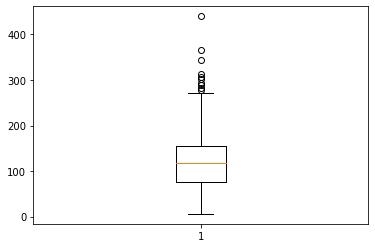

In [41]:
plt.boxplot(wine["total sulfur dioxide"])

{'whiskers': [<matplotlib.lines.Line2D at 0x245d3ef5040>,
 'caps': [<matplotlib.lines.Line2D at 0x245d3ef55e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x245d3ee6d30>],
 'medians': [<matplotlib.lines.Line2D at 0x245d3ef5b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x245d3ef5e50>],
 'means': []}

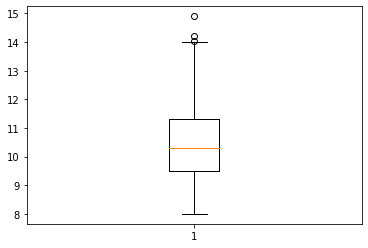

In [42]:
plt.boxplot(wine["alcohol"])

{'whiskers': [<matplotlib.lines.Line2D at 0x245d3f54a60>,
 'caps': [<matplotlib.lines.Line2D at 0x245d3f63040>,
 'boxes': [<matplotlib.lines.Line2D at 0x245d3f54760>],
 'medians': [<matplotlib.lines.Line2D at 0x245d3f635e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x245d3f638b0>],
 'means': []}

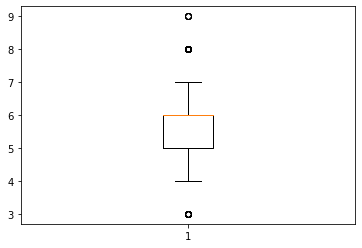

In [43]:
plt.boxplot(wine["quality"])

La estratificación si conviene hacerla con la columna type, debido que es la variable categórica que tenemos, por lo tanto se va a evaluar junto la columna quality y fixed acidity

<AxesSubplot:xlabel='type', ylabel='fixed acidity'>

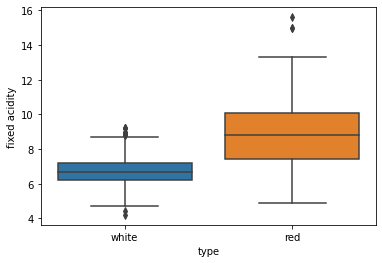

In [77]:
sns.boxplot(data = wine.loc[ (wine['quality'] == 7), : ], x= 'type', y ='fixed acidity' )

In [78]:
limit_b = wine.loc[(wine["type"] == "white") & (wine["quality"] == 7), ["fixed acidity"]]
limit_b

,fixed acidity
13,6.6
15,6.6
21,6.4
29,7.2
45,7.4
...,...
4870,6.1
4876,6.2
4886,6.2
4887,6.2


{'whiskers': [<matplotlib.lines.Line2D at 0x245d6194040>,
 'caps': [<matplotlib.lines.Line2D at 0x245d61945e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x245d6185d00>],
 'medians': [<matplotlib.lines.Line2D at 0x245d6194b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x245d6194e50>],
 'means': []}

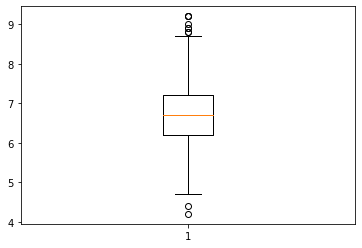

In [79]:
plt.boxplot(limit_b)

In [80]:
# Calculo del primer cuartile 
q1 = np.quantile(limit_b,0.25)
q1

6.2

In [81]:
# Calculo del tercer cuartile 
q3 = np.quantile(limit_b,0.75)
q3

7.2

In [82]:
# Calculo del segundo cuartile 
q2 = np.median(limit_b)
q2

6.7

In [83]:
#Calculo del iqr
iqr = q3 - q1
iqr

1.0

In [84]:
# Veremos los valores atípicos superiores
upper = q3 + (1.5*iqr)
upper

8.7

In [85]:
# Veremos los valores atípicos inferiores 
lower = q1 - (1.5*iqr)
lower

4.7

Una vez encontrados los valores superiores e inferiores se empezará con la estratificación, con el quality = 7

Estratificación
---

In [88]:
dfq1 = wine.loc[:,["type", "quality", "fixed acidity"]].groupby(["type", "quality"], as_index = False).quantile(0.25)
dfq1.columns = ["type", "quality", "fixed 1"]
dfq1

,type,quality,fixed 1
0,red,3,7.150
1,red,4,6.800
2,red,5,7.100
3,red,6,7.000
4,red,7,7.400
5,red,8,7.250
6,white,3,6.575
7,white,4,6.400
8,white,5,6.400
9,white,6,6.300


In [89]:
dfq3 = wine.loc[:,["type", "quality", "fixed acidity"]].groupby(["type", "quality"], as_index = False).quantile(0.75)
dfq3.columns = ["type", "quality", "fixed 3"]
dfq3

,type,quality,fixed 3
0,red,3,9.875
1,red,4,8.400
2,red,5,8.900
3,red,6,9.400
4,red,7,10.100
5,red,8,10.225
6,white,3,8.525
7,white,4,7.600
8,white,5,7.400
9,white,6,7.300


In [90]:
dfq2 = wine.loc[:,["type", "quality", "fixed acidity"]].groupby(["type", "quality"], as_index = False).quantile(0.50)
dfq2.columns = ["type", "quality", "fixed 2"]
dfq2

,type,quality,fixed 2
0,red,3,7.50
1,red,4,7.50
2,red,5,7.80
3,red,6,7.90
4,red,7,8.80
5,red,8,8.25
6,white,3,7.30
7,white,4,6.90
8,white,5,6.80
9,white,6,6.80


In [91]:
df_iqr = dfq1.merge(dfq3, on = ["type", "quality"], how = "inner").merge(dfq2, on = ["type", "quality"], how = "inner")
df_iqr["IQR"] = df_iqr.apply(lambda r: r["fixed 3"] - r["fixed 1"], axis = 1)
df_iqr["Upper"] = df_iqr.apply(lambda r: r["fixed 3"] + 1.5*r["IQR"], axis = 1)
df_iqr["Lower"] = df_iqr.apply(lambda r: r["fixed 1"] - 1.5*r["IQR"], axis = 1)
df_iqr

,type,quality,fixed 1,fixed 3,fixed 2,IQR,Upper,Lower
0,red,3,7.150,9.875,7.50,2.725,13.9625,3.0625
1,red,4,6.800,8.400,7.50,1.600,10.8000,4.4000
2,red,5,7.100,8.900,7.80,1.800,11.6000,4.4000
3,red,6,7.000,9.400,7.90,2.400,13.0000,3.4000
4,red,7,7.400,10.100,8.80,2.700,14.1500,3.3500
5,red,8,7.250,10.225,8.25,2.975,14.6875,2.7875
6,white,3,6.575,8.525,7.30,1.950,11.4500,3.6500
7,white,4,6.400,7.600,6.90,1.200,9.4000,4.6000
8,white,5,6.400,7.400,6.80,1.000,8.9000,4.9000
9,white,6,6.300,7.300,6.80,1.000,8.8000,4.8000


In [93]:
wine_t = wine.merge(df_iqr, on = ["type", "quality"], how = "left").copy()
wine_t.shape

(6497, 19)

In [94]:
def getFixed(r): 
    if((r["fixed acidity"] <= r["Lower"]) or (r["fixed acidity"] >= r["Upper"])):
        return r["fixed 2"]
    else:
        return r["fixed acidity"]

Se mostrará el dataset generado por el merge

In [95]:
wine_t["New_Fixed"] = wine_t.apply(lambda r: getFixed(r), axis = 1)
wine_t

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fixed 1,fixed 3,fixed 2,IQR,Upper,Lower,New_Fixed
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,6.3,7.3,6.8,1.0,8.8,4.8,7.0
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,6.3,7.3,6.8,1.0,8.8,4.8,6.3
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,6.3,7.3,6.8,1.0,8.8,4.8,8.1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,6.3,7.3,6.8,1.0,8.8,4.8,7.2
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,6.3,7.3,6.8,1.0,8.8,4.8,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,7.1,8.9,7.8,1.8,11.6,4.4,6.2
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,7.0,9.4,7.9,2.4,13.0,3.4,5.9
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,7.0,9.4,7.9,2.4,13.0,3.4,6.3
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,7.1,8.9,7.8,1.8,11.6,4.4,5.9


Comparación 

<AxesSubplot:xlabel='type', ylabel='fixed acidity'>

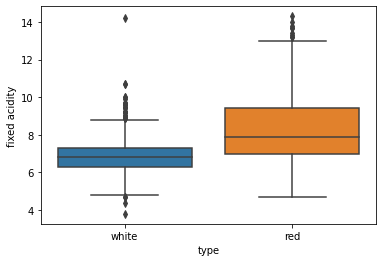

In [110]:
# Sin estratificar
sns.boxplot(data = wine.loc[ (wine['quality'] == 6), : ], x= 'type', y ='fixed acidity' )

<AxesSubplot:xlabel='type', ylabel='New_Fixed'>

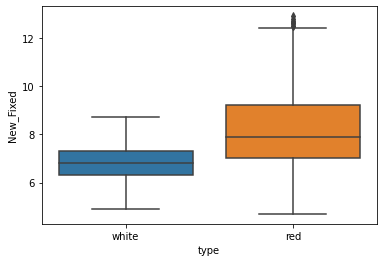

In [111]:
# Estratificado
sns.boxplot(data = wine_t.loc[ (wine_t['quality'] == 6), : ], x= 'type', y ='New_Fixed' )